In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Định nghĩa hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Định nghĩa hàm chi phí (hay hàm mất mát) dựa trên cross - entropy
def compute_cost(Y, Y_hat):
    m = Y.shape[1]
    return -1/m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

# Hồi quy Logistic với Giải thuật Lan truyền ngược

In [6]:
def logistic_regression_nn(X, Y, learning_rate, num_iterations):
    m, n = X.shape
    W = np.random.randn(1, m) * 0.01
    b = 0
    costs = []
    accuracies = []

    for i in range(num_iterations):
        Z = np.dot(W, X) + b
        A = sigmoid(Z)
        cost = compute_cost(Y, A)
        costs.append(cost)

        dZ = A - Y
        dW = 1/n * np.dot(dZ, X.T)
        db = 1/n * np.sum(dZ)

        # Cập nhật ma trận trọng số theo Stochastic Gradient Descent
        W -= learning_rate * dW
        b -= learning_rate * db

        accuracy = np.mean((A > 0.5) == Y)
        accuracies.append(accuracy)

        if i % 10 == 0:
            print(f"Iteration {i}, Cost: {cost}, Accuracy: {accuracy}")

    return W, b, costs, accuracies

In [7]:
# Đọc dữ liệu
data = pd.read_csv("C:\\Users\\admin\\Downloads\\diabetes.csv")
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Chia tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa và tiền xử lý dữ liệu, phép toán .T để lấy chuyển vị
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_T = X_train_scaled.T
y_train_T = y_train.reshape(1, y_train.shape[0])
X_test_T = X_test_scaled.T
y_test_T = y_test.reshape(1, y_test.shape[0])

In [8]:
# Huấn luyện mô hình với tốc độ học 0.5 và số vòng lặp 500
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.5, num_iterations=500)

Iteration 0, Cost: 0.689643451424574, Accuracy: 0.6742671009771987
Iteration 10, Cost: 0.5019035568924861, Accuracy: 0.762214983713355
Iteration 20, Cost: 0.47927138857848584, Accuracy: 0.7687296416938111
Iteration 30, Cost: 0.4724781249321506, Accuracy: 0.7654723127035831
Iteration 40, Cost: 0.46989903272885725, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.4688014800885145, Accuracy: 0.7654723127035831
Iteration 60, Cost: 0.4683026811758358, Accuracy: 0.7671009771986971
Iteration 70, Cost: 0.46806643190392166, Accuracy: 0.7687296416938111
Iteration 80, Cost: 0.4679513885958058, Accuracy: 0.7687296416938111
Iteration 90, Cost: 0.46789425688291814, Accuracy: 0.7687296416938111
Iteration 100, Cost: 0.46786546973074983, Accuracy: 0.7703583061889251
Iteration 110, Cost: 0.46785080197217943, Accuracy: 0.7703583061889251
Iteration 120, Cost: 0.46784326194279596, Accuracy: 0.7703583061889251
Iteration 130, Cost: 0.4678393578463783, Accuracy: 0.7703583061889251
Iteration 140, Cost: 0.467

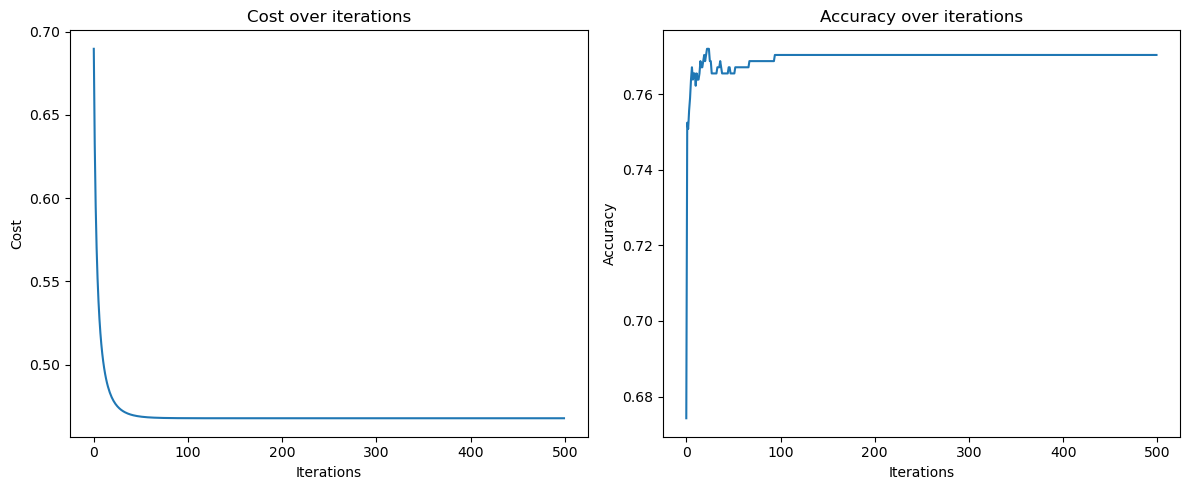

In [9]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [12]:
# Huấn luyện mô hình với tốc độ học 0.1 và số vòng lặp 500
W, b, costs, accuracies = logistic_regression_nn(X_train_T, y_train_T, learning_rate=0.1, num_iterations=500)

Iteration 0, Cost: 0.6923464595551089, Accuracy: 0.5325732899022801
Iteration 10, Cost: 0.6012266988598761, Accuracy: 0.754071661237785
Iteration 20, Cost: 0.5564335064148469, Accuracy: 0.757328990228013
Iteration 30, Cost: 0.5309592053009833, Accuracy: 0.7638436482084691
Iteration 40, Cost: 0.5148587590024948, Accuracy: 0.7654723127035831
Iteration 50, Cost: 0.5039307217530868, Accuracy: 0.7638436482084691
Iteration 60, Cost: 0.4961405137409609, Accuracy: 0.7654723127035831
Iteration 70, Cost: 0.4903895560096512, Accuracy: 0.7687296416938111
Iteration 80, Cost: 0.48603265982304855, Accuracy: 0.7671009771986971
Iteration 90, Cost: 0.48266559956844074, Accuracy: 0.7687296416938111
Iteration 100, Cost: 0.4800221363187283, Accuracy: 0.7687296416938111
Iteration 110, Cost: 0.4779199313464801, Accuracy: 0.7719869706840391
Iteration 120, Cost: 0.4762301794086486, Accuracy: 0.7719869706840391
Iteration 130, Cost: 0.47485958851295845, Accuracy: 0.7687296416938111
Iteration 140, Cost: 0.4737391

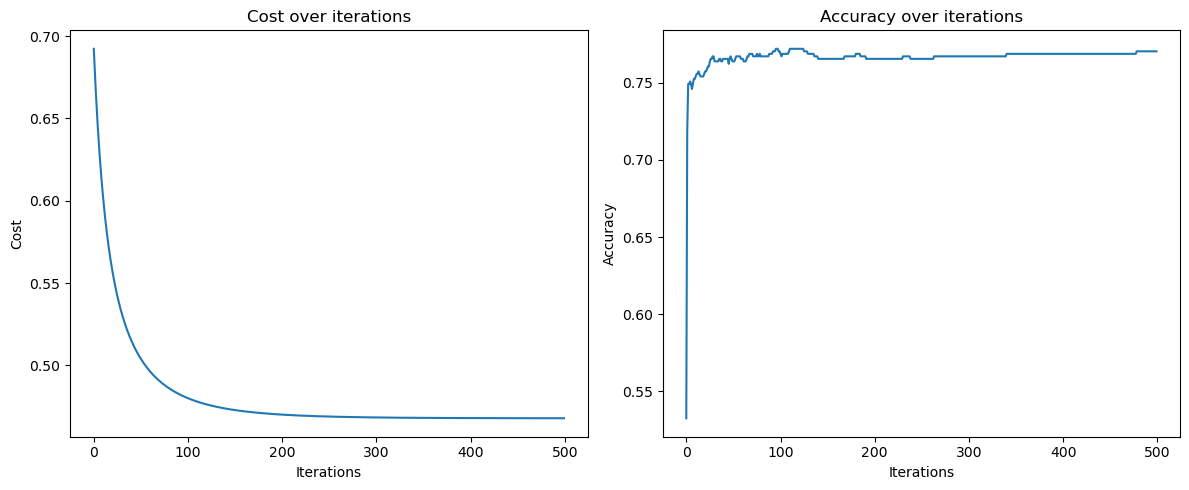

In [13]:
# Vẽ đồ thị chi phí và độ chính xác
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(costs)
plt.title('Cost over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy over iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Với tốc độ học 0.5, accuracy và cost hội tụ sau khoảng 100 vòng lặp.
Với tốc độ học 0.1, accuracy và cost hội tụ sau khoảng 480 vòng lặp.